In [2]:
import pandas as pd
from textblob import TextBlob

In [2]:
df = pd.read_csv('Flipkart_webscraped_data.csv')

In [3]:
df[:1]

,rating,review_summary,review_description,product_id,Price
0,5,Classy product,This is the value for money phone...For Flipka...,iPhone 12,30999


In [4]:
df.duplicated().sum()

20

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# Checking any blank cell is there using space "  "
blank=[]
for i,j,k,l,m,n in df.itertuples():
  if type(j)==str:
    if j.isspace():
      blank.append(i)

In [8]:
df.loc[blank]

,rating,review_summary,review_description,product_id,Price


In [9]:
# finding str length below 10 count
Word_Length=[]
for i,j,k,l,m,n in df.itertuples():
  if type(j)==str:
    if len(j)<10:
      Word_Length.append(i)

In [10]:
df.loc[Word_Length]

,rating,review_summary,review_description,product_id,Price


In [11]:
# I deleted duplicated 30 values so reset_index inclination.
df.reset_index(drop=True, inplace=True)

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [13]:
# Add sentiment scores to the DataFrame
df['Sentiment_Score'] = df['review_description'].apply(lambda x: sia.polarity_scores (str(x)))

# Optional: You can classify the sentiments as Positive, Negative, or Neutral
def compound(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification to the sentiment column
df['compound'] = df['Sentiment_Score'].apply(lambda x:x["compound"])
df['vader_lexicon_Sentiment'] = df['compound'].apply(compound)  # Then categorize the sentiment

In [14]:
df

,rating,review_summary,review_description,product_id,Price,Sentiment_Score,compound,vader_lexicon_Sentiment
0,5,Classy product,This is the value for money phone...For Flipka...,iPhone 12,30999,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.7650,Positive
1,5,Perfect product!,The brand is very trustworthy and i got genuin...,iPhone 12,30999,"{'neg': 0.039, 'neu': 0.768, 'pos': 0.193, 'co...",0.7650,Positive
2,5,Terrific,Wow superb camera phone.Very smooth speed and ...,iPhone 12,30999,"{'neg': 0.168, 'neu': 0.401, 'pos': 0.431, 'co...",0.8481,Positive
3,5,Terrific purchase,Awesome phone … value for money.. Happy with b...,iPhone 12,30999,"{'neg': 0.049, 'neu': 0.694, 'pos': 0.257, 'co...",0.7906,Positive
4,5,Simply awesome,Amazing phone.In love with this phone,iPhone 12,30999,"{'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'comp...",0.8402,Positive
...,...,...,...,...,...,...,...,...
502,5,Wonderful,Nice,SAMSUNG Galaxy S23 5G,39999,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4215,Positive
503,5,Just wow!,Worth at 45k in this offer range including exc...,SAMSUNG Galaxy S23 5G,39999,"{'neg': 0.053, 'neu': 0.901, 'pos': 0.046, 'co...",-0.1531,Negative
504,4,Good quality product,The camera quality of S20 is better than S23. ...,SAMSUNG Galaxy S23 5G,39999,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.7964,Positive
505,5,Wonderful,Awesome,SAMSUNG Galaxy S23 5G,39999,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,Positive


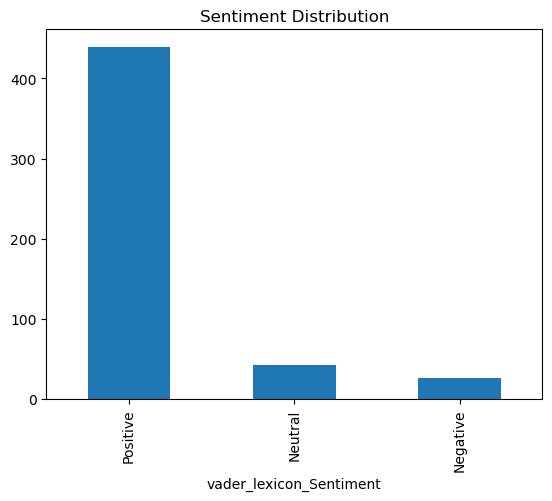

In [15]:
import matplotlib.pyplot as plt

# Visualize sentiment distribution
df['vader_lexicon_Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.show()

In [16]:
# Function to categorize the sentiment based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

def get_polarity(text):
    try:   # Create a TextBlob object
        blob = TextBlob(str(text))  # Ensure text is treated as a string
        return blob.sentiment.polarity  # Get the polarity score (-1 to 1)
    except Exception as e:
        return None  # Handle potential errors and return None

# Assuming df is your DataFrame and 'Review' is the column with the text data
df['Polarity'] = df['review_description'].apply(get_polarity)  # First calculate the polarity
df['TextBlob_Sentiment'] = df['Polarity'].apply(categorize_sentiment)  # Then categorize the sentiment

# Show the DataFrame with the polarity and sentiment columns
print(df[['review_description', 'Polarity', 'Sentiment_Score']])

# Save results Optionally, save the DataFrame to a CSV file.
df.to_csv('sentiment_analysis_flipkart.csv', index=False)

                                    review_description  Polarity  \
0    This is the value for money phone...For Flipka...  0.500000   
1    The brand is very trustworthy and i got genuin...  0.133333   
2    Wow superb camera phone.Very smooth speed and ...  0.587500   
3    Awesome phone … value for money.. Happy with b...  0.646667   
4                Amazing phone.In love with this phone  0.550000   
..                                                 ...       ...   
502                                               Nice  0.600000   
503  Worth at 45k in this offer range including exc...  0.206667   
504  The camera quality of S20 is better than S23. ...  0.500000   
505                                            Awesome  1.000000   
506  Never trust on Flipkart reviews.Worst mobile p... -0.081944   

                                       Sentiment_Score  
0    {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...  
1    {'neg': 0.039, 'neu': 0.768, 'pos': 0.193, 'co...  
2    {'neg':

In [2]:
df

NameError: name 'df' is not defined

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(df["vader_lexicon_Sentiment"], df["TextBlob_Sentiment"])

0.9072978303747534

In [32]:
from transformers import pipeline

In [44]:
from langchain import PromptTemplate
from langchain.llms import HuggingFacePipeline
from transformers import pipeline

# Set your Hugging Face API key
HUGGING_FACE_API_KEY = "********************"  

In [45]:
# Load your dataset
df1 = pd.read_csv("sentiment_analysis_flipkart.csv")

In [49]:
# Initialize the Hugging Face pipeline for sentiment analysis
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    tokenizer="distilbert-base-uncased-finetuned-sst-2-english",
    device=-1 ) # Use -1 for CPU



# Define a function to analyze sentiment
def analyze_sentiment(row):
    text = row['review_description']
    
    # Tokenize and split long text into chunks of 512 tokens
    inputs = sentiment_pipeline.tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    
    # Perform sentiment analysis on each chunk
    result = sentiment_pipeline(text, truncation=True, max_length=512)
    
    # Get the sentiment label and score
    sentiment = result[0]['label']
    score = result[0]['score']
    
    return pd.Series([sentiment, score])



# Apply the sentiment analysis function to the DataFrame
df1[['predicted_sentiment', 'compound']] = df1.apply(analyze_sentiment, axis=1)

# Define a function to generate product recommendations
def generate_recommendation(row):
    if row['compound'] >= 0.7:
        return f"Highly recommend {row['product_id']}! Users love it for its {row['review_description'][:50]}..."
    elif row['compound'] >= 0.4:
        return f"Consider {row['product_id']} if you're looking for a solid option. Users say: {row['review_description'][:50]}..."
    else:
        return f"You might want to research more before choosing {row['product_id']}. Some users mentioned: {row['review_description'][:50]}..."

# Apply the recommendation function to the DataFrame
df1['recommendation'] = df1.apply(generate_recommendation, axis=1)

In [50]:
# Display the results
print(df1[['review_description', 'review_summary', 'compound', 'predicted_sentiment', 'recommendation']])

                                    review_description        review_summary  \
0    This is the value for money phone...For Flipka...        Classy product   
1    The brand is very trustworthy and i got genuin...      Perfect product!   
2    Wow superb camera phone.Very smooth speed and ...              Terrific   
3    Awesome phone … value for money.. Happy with b...     Terrific purchase   
4                Amazing phone.In love with this phone        Simply awesome   
..                                                 ...                   ...   
502                                               Nice             Wonderful   
503  Worth at 45k in this offer range including exc...             Just wow!   
504  The camera quality of S20 is better than S23. ...  Good quality product   
505                                            Awesome             Wonderful   
506  Never trust on Flipkart reviews.Worst mobile p...              Horrible   

     compound predicted_sentiment  \
0 

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rating                   507 non-null    int64  
 1   review_summary           507 non-null    object 
 2   review_description       507 non-null    object 
 3   product_id               507 non-null    object 
 4   Price                    507 non-null    int64  
 5   Sentiment_Score          507 non-null    object 
 6   compound                 507 non-null    float64
 7   vader_lexicon_Sentiment  507 non-null    object 
 8   Polarity                 507 non-null    float64
 9   TextBlob_Sentiment       507 non-null    object 
 10  predicted_sentiment      507 non-null    object 
 11  recommendation           507 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 47.7+ KB


In [52]:
from langchain import PromptTemplate

# Aggregate data by Product Name, calculating the average compound score and sentiment count
most_recommended_mobile_phone = df1.groupby('product_id').agg(
    average_compound_score=('compound', 'mean'),
    average_compound_sentiment=('TextBlob_Sentiment', 'count')  # Adjusting sentiment count for simplicity
).reset_index()

# Sort by average compound score in descending order and select the top phone
most_recommended_mobile_phone = most_recommended_mobile_phone.sort_values(
    by=['average_compound_score'],  # Sorting by average sentiment score
    ascending=False
).head(1)  # Get the top 1 mobile phone

# Define the LangChain template for recommendation
template = """
Based on sentiment analysis, we recommend the following mobile phone:

**Model**: {mobile}
- Average Sentiment Score: {average_compound_score:.2f}
- Positive Sentiment Count: {average_compound_sentiment}

This mobile is highly recommended by users for its excellent features and performance!
"""

# Create a PromptTemplate in LangChain
recommendation_template = PromptTemplate.from_template(template)

# Generate recommendations for the top phone
for _, row in most_recommended_mobile_phone.iterrows():
    prompt = recommendation_template.format(
        mobile=row['product_id'],  # Changed to 'Product Name' from the dataframe
        average_compound_score=row['average_compound_score'],
        average_compound_sentiment=row['average_compound_sentiment']
    )
    print(prompt)


Based on sentiment analysis, we recommend the following mobile phone:

**Model**: iPhone 12
- Average Sentiment Score: 0.99
- Positive Sentiment Count: 143

This mobile is highly recommended by users for its excellent features and performance!



In [53]:
most_recommended_mobile_phone.to_pickle('recommended_phones.pkl')

In [3]:
r_plk = pd.read_pickle('recommended_phones.pkl')
r_plk

,product_id,average_compound_score,average_compound_sentiment
3,iPhone 12,0.986556,143
